# 05 PJT

챕터 포인트
- 관통 Ver1. 키워드 검색량 분석을 위한 데이터 수집
- 관통 Ver2. 인증 페이지 구현

## 목표

### 프로젝트 파악하기
- 친구들끼리 같이 먹을 음식을 주문하기로 했다.
- 갑자기 궁금해졌다.
- 사람들이 깐풍기를 선호할까, 탕수육을 선호할까?

- 구글에 검색해보고 어떤 메뉴가 더 많이 검색되는 지로 판별해보고자 한다.

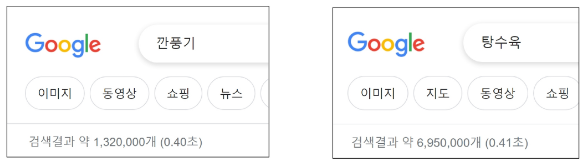
- 어떻게 위와 같은 웹 페이지의 결과를 코드로 활용할 수 있을까?

### 파이썬으로 웹 페이지에 있는 정보를 가져오는 방법
- 크게 세 가지 방법으로 가져올 수 있다.
    1. 누군가 업로드 해 둔 데이터를 다운로드 받기 (ex. 캐글)
    2. 누군가 만들어 둔 API Server를 활용해 정보를 받아오기
        - 아마 깐풍기와 탕수육 API Server는 아무도 만들어 두지 않았을 것 같다.
    3. `사람들이 검색하는 것처럼 파이썬이 자동으로 검색 후 결과를 수집하는 방법`
        - 이러한 기술을 `크롤링(Crawling)`이라고 한다
        - 이번 프로젝트에서 사용할 기술.

### 프로젝트 목표
1. Django없이, 크롤링 하는 방법 학습
2. 구글 검색 수를 크롤링하여 어떤 키워드가 더 많이 검색되는 지 조사하기

## 웹 크롤링 이해하기

### [복습] 데이터 사이언스 프로세스
- 필요한 정보를 추출하는 5가지 단계
    1. `문제 정의` : 해결하고자 하는 문제 정의
    2. 데이터 `수집` : 문제 해결에 필요한 데이터 수집
    3. 데이터 `전처리(정제)` : 실질적인 문제 분석을 수행하기 위해 데이터를 가공하는 단계
        - 수집한 데이터의 오류 제거(결측치, 이상치), 데이터 형식 변환 등
    4. 데이터 `분석` : 전처리가 완료된 데이터에서 필요한 정보를 추출하는 단계
    5. 결과 해석 및 `공유` : 의사 결정에 활용하기 위해 결과를 해석하고 시각화 후 공유하는 단계

- numpy, pandas, matplotlib 

### [복습] 데이터 수집
- 데이터 수집은 다양한 기술과 방법을 활용할 수 있다.
    - 웹 스크래핑 : 웹 페이지에서 데이터를 추출하는 기술
        - 한 페이지에서.
    - 웹 크롤링 : 웹 페이지를 자동으로 탐색하고 데이터를 수집하는 기술
        - 여러 웹페이지에서.
    - Open API 활용 : 공개된 API 를 통해 데이터를 수집
    - 데이터 공유 플랫폼 활용 : 다양한 사용자가 데이터를 공유하고 활용할 수 있는 온라인 플랫폼
        - 종류 : 캐글(Kaggle), Data.world, 데이콘(Dacon), 공공데이터포털 등

### 웹 크롤링이란?
- 여러 웹 페이지를 돌아다니며 원하는 정보를 모으는 기술
- 원하는 정보를 추출하는 스크래핑(Scraping)과 여러 웹 페이지를 자동으로 탐색하는 크롤링(Crawling)의 개념을 합쳐 웹 크롤링이라고 부름
- 즉 웹 사이트를 돌아다니며 `필요한 데이터를 추출하여 활용할 수 있도록 자동화된 프로세스`

### 웹 크롤링 프로세스
- 웹 페이지 다운로드
    - 해당 웹 페이지의 HTML, CSS, JavaScript 등의 코드를 가져오는 단계
- 페이지 파싱
    - 다운로드 받은 코드를 분석하고 필요한 데이터를 추출하는 단계
- 링크 추출 및 다른 페이지 탐색
    - 다른 링크를 추출하고, 다음 단계로 이동하여 원하는 데이터를 추출하는 단계
- 데이터 추출 및 저장
    - 분석 및 시각화에 사용하기 위해 데이터를 처리하고 저장하는 단계

## 웹 크롤링 실습

### 준비 단계
- 실습 및 도전 과제에는 구글 검색 결과 페이지를 크롤링합니다.
- 아래 필수 라이브러리를 설치 후 진행합니다.
    - requests : HTTP 요청을 보내고 응답을 받을 수 있는 모듈
    - BeautifulSoup : HTML 문서에서 원하는 데이터를 추출하는 데 사용되는 파이썬 라이브러리
    - Selenium : 웹 애플리케이션을 테스트하고 자동화하기 위한 파이썬 라이브러리
        - 웹 페이지의 동적인 컨텐츠를 가져오기 위해 사용함 (검색 결과 등)
- `$ pip install requests beautifulsoup4 selenium`

### 기본 예제 실습
- Quotes to Scrape 사이트를 활용한다
    - 여러가지 주제에 관한 명언들을 모아 둔 데모 사이트
- requests 및 BeautifulSoup 라이브러리 활용 연습
    - examples/example.py

### 구글 기본 예제
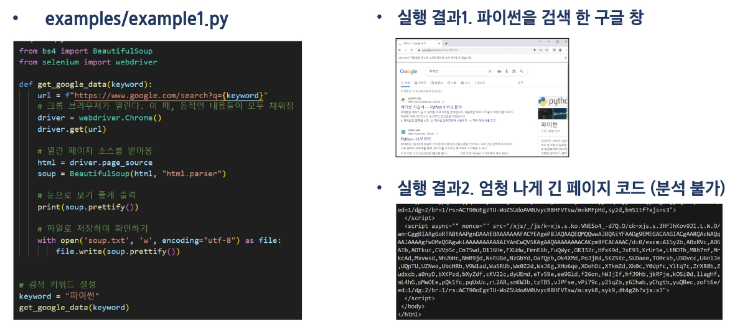

requests 모듈은 정적인 부분만 다운로드 가능. 
- 정적이다 ? 서버가 이미 가지고 있는 데이터만.
- 동적인 컨텐츠를 다운로드 받을 수 없다 !
    - (탕수육이라는 결과를 통해서 변경되는 부분)

그럼 어떻게 하는가?
- 동적인 컨텐츠를 받는 방법 : selenium

`selenium` : 개발자들이 동적 웹 테스트를 위해서 많이 사용
- -> 오늘 우리는 크롤링에서 활용

### 구글 검색 결과 분석하기

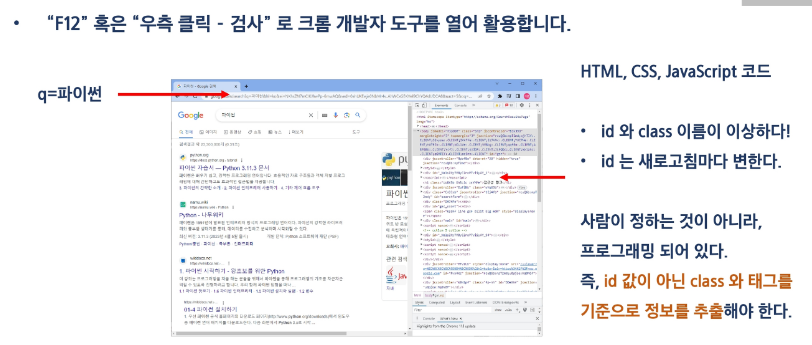

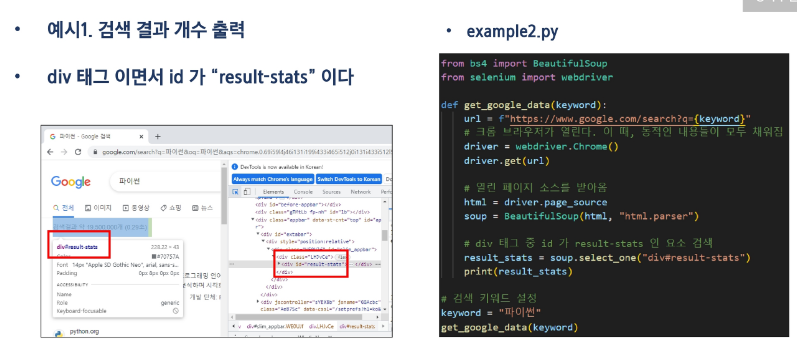

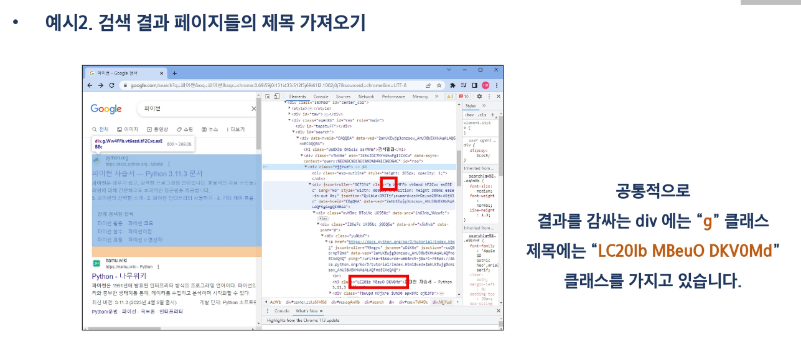

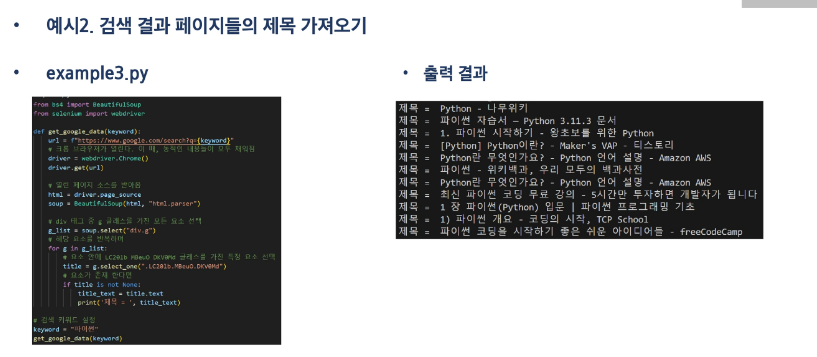

### [참고] BeautilfulSoup4 요소 선택 메서드 종류

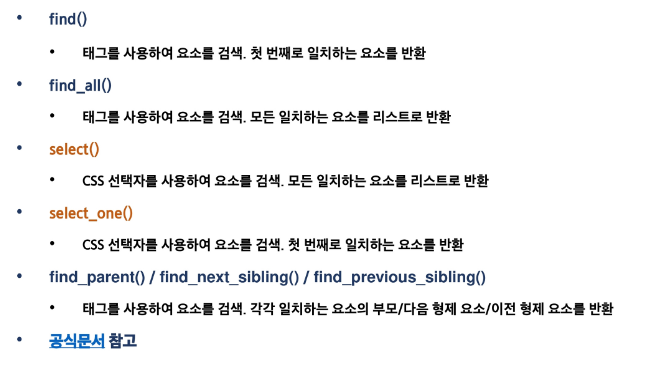

## Django에서 활용하기

### 크롤링 결과 저장하기
- Django에서 크롤링 진행 후 아래 데이터를 데이터베이스에 저장
- 검색어와 게시글 제목을 DB에 저장

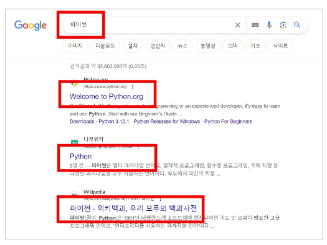
- 저장하고 싶은 데이터 : 검색어, 게시글 제목들
- models.py 를 어떻게 작성 해야할까?

### 유저 인증 기능 추가하기
1. 로그인

2. 로그아웃

3. 인증된 유저만 크롤링 결과를 볼 수 있도록 구성하기

## 도전 과제

### 금융 상품 비교 앱 PJT 05

#### 관통 Ver1 - PJT05 도전 과제
- 프로젝트명 : 키워드 검색량 분석을 위한 데이터 수집
- 목표
    - 크롤링을 위한 데이터 수집
    - 수집한 데이터를 DB에 저장하고, 저장한 데이터 활용하기
- 특징
    - 데이터 사이언스 패키지 사용
    - 수집한 데이터를 저장하고 활용할 수 있도록 DB 설계

### 영화 추천 서비스 PJT 05

#### 관통 Ver2 - PJT05 도전 과제
- 프로젝트명 : 인증 페이지 구현
- 목표
    - 로그인, 로그아웃, 회원가입, 회원탈퇴, 회원정보수정, 비밀번호 변경이 가능한 애플리케이션 완성
- 특징
    - 완성 화면 예시를 보며 기능 구현

# +

## GIT BRANCH

### GIT 복습

```bash
# 이 폴더를 git으로 관리하겠다.
$ git init
```
- 현재 작업중이 폴더 내의 .git을 제외한 폴더 위치를 `working directory`
- woworking directory 에만 작성한 내용은 아직 git이 어떤 변동 사항이 있는지 모른다.

```bash
# staging area에 해당하는 파일을 등록
$ git add {file_path}
```

- `staging area`란, 등록한 파일들의 변동사항만 기록한 txt 파일을 `.git` 폴더 어딘가에 모아둔다.

```bash
# staging area에 등록해둔 변동사항을 하나의 버전으로 기록한다. 그 후, staging area는 비운다.
$ git commit -m "commit message"
```

- `commit` 즉, 버전이란, 아까 전 `staging area`에 등록해둔, 변동사항 만을 모아서 하나의 상태로 저장한다.
- 그 곳을 `repository` 라고 부른다.

## Git Branch

나뭇가지처럼 여러 갈래로 작업 공간을 나누어 독립적으로 작업할 수 있도록 도와주는 Git의 도구

### 장점
1. 독립된 개발 환경을 형성하기 때문에 원본(master)에 대해 안전
2. 하나의 작업은 하나의 브랜치로 나누어 진행되므로 체계적으로 협업, 개발 가능
3. 손쉽게 브랜치를 생성하고 브랜치 사이를 이동할 수 있음

### 꼭 사용해야 하는가?
- 만약 상용 중인 서비스에 발생한 에러를 해결하려면?
1. 브랜치를 통해 별도의 작업 공간을 만든다.
2. 브랜치에서 에러가 발생한 버전을 이전 버전으로 되돌리거나 삭제한다.
3. 브랜치는 완전하게 독립 되어있어서 작업 내용이 master 브랜치에~

### 명령어
1. git branch
git branch : 브랜치 목록 확인
git branch -r : 원격 저장소의 브랜치 목록 확인
git branch <브랜치 이름> : 새로운 브랜치 생성
git branch -d <브랜치 이름> : 브랜치 삭제 (병합된 브랜치만 삭제 가능)
git branch -D <브랜치 이름> : 브랜치 삭제 (강제)

2. git switch
git switch <다른 브랜치 이름> : 브랜치 목록 확인
git switch -c <브랜치 이름> : 원격 저장소의 브랜치 목록 확인
git switch -c <브랜치 이름> <commit ID> : 새로운 브랜치 생성
